# kalman
卡尔曼滤波器是信号处理中非常重要的一部分。它可以对于信号进行参数估计

## 测试步骤
1. 默认参数结果
2. 调参结果
3. 比较最优

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from jy_strategy import Strategy,SMA,MACD,Param,Kalman,HP,Linear_Model,UKF,new_Kalman_0
from matplotlib import pylab
from jy_center import Center_Param, Center

In [2]:
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 6)

In [3]:
C_param = Center_Param()# 初始化参数
C_param.start_date='2010-01-01'
C_param.end_date = '2015-12-30'
C = Center(C_param)   # 实例化交易中心变量

df = pd.read_csv("600005.XSHG.csv") #导入测试数据

real date:2009-12-31
[[ 7.22      ]
 [ 7.17477612]
 [ 7.14266241]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
money:1082806.78
cangwei:0
roi:0.08280678000000002
alpha:0.0564392852197
beta:0.9272763077
algorithem volatility: 3.19396832047
bench volatility: 3.22398130464
sharpe ratio: 0.304967065331
max drawdown: 0.48574941134158794
win ratio:0.1705263157894737
1425


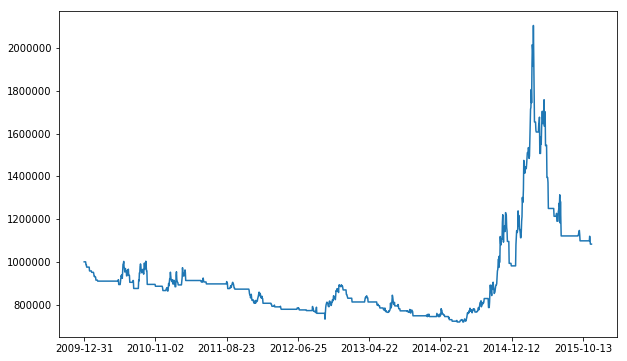

In [4]:
p=Param([20,5],5,5)
C.choose_strategy(Kalman("a", df))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

,name,time,price,tick,Signal,his_ts_index,trend
0,ss,2010-02-25,6.02,166112.0,1.0,35.0,0.000119
1,ss,2010-02-26,5.94,166112.0,-1.0,36.0,-0.007514
2,ss,2010-03-01,6.02,163905.0,1.0,37.0,0.000823
3,ss,2010-03-02,5.95,163905.0,-1.0,38.0,-0.005921
4,ss,2010-03-11,5.99,162810.0,1.0,45.0,0.003447
5,ss,2010-03-12,5.88,162810.0,-1.0,46.0,-0.007347
6,ss,2010-03-19,5.92,161710.0,1.0,51.0,0.001432
7,ss,2010-03-22,5.88,161710.0,-1.0,52.0,-0.002509
8,ss,2010-03-29,5.95,159808.0,1.0,57.0,0.006576
9,ss,2010-03-31,5.83,159808.0,-1.0,59.0,-0.005579


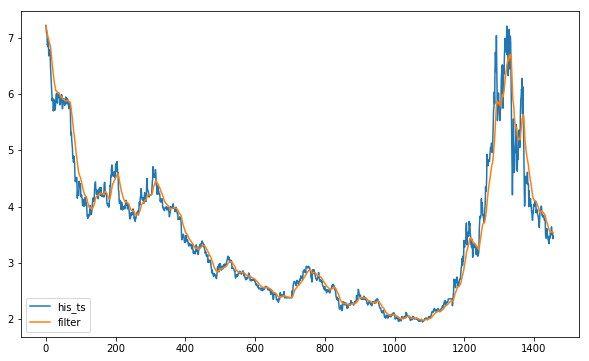

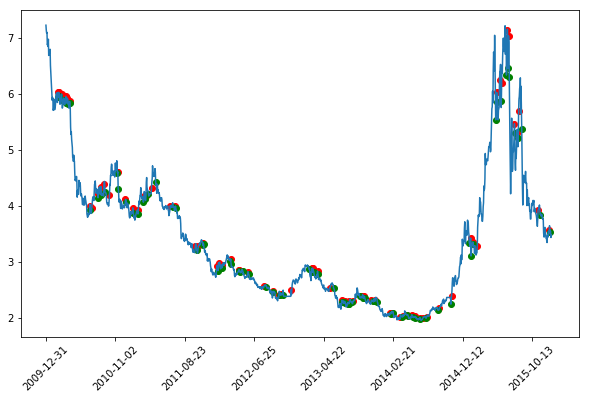

In [5]:
C.print_plot_filter()
C.print_trade_log_pic()
C.trade_log

,name,time,price,tick,Signal,his_ts_index,trend
0,ss,2010-07-29,4.38,228310.0,1.0,140.0,0.001595
1,ss,2010-08-03,4.32,228310.0,-1.0,143.0,-0.000485
2,ss,2010-08-17,4.32,228310.0,1.0,153.0,0.000222
3,ss,2010-08-18,4.30,228310.0,-1.0,154.0,-0.000408
4,ss,2010-08-19,4.34,226206.0,1.0,155.0,0.000850
5,ss,2010-08-20,4.21,226206.0,-1.0,156.0,-0.003223
6,ss,2010-08-24,4.34,219430.0,1.0,158.0,0.001031
7,ss,2010-08-25,4.19,219430.0,-1.0,159.0,-0.003671
8,ss,2010-09-06,4.39,209433.0,1.0,167.0,0.003359
9,ss,2010-09-09,4.25,209433.0,-1.0,170.0,-0.001379


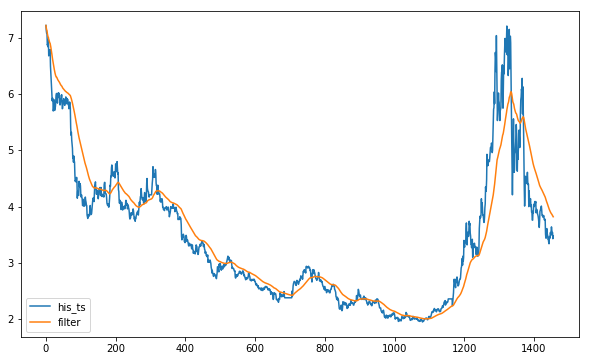

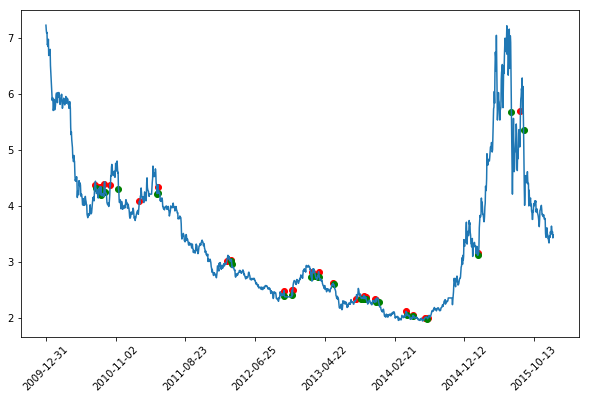

In [7]:
C.print_plot_filter()
C.print_trade_log_pic()
C.trade_log

real date:2009-12-31
money:1819729.7599999998
cangwei:0
roi:0.8197297599999998
alpha:-0.746106940947
beta:1.83598160766
algorithem volatility: 6.51583066297
bench volatility: 3.22398130464
sharpe ratio: 0.164330121758
max drawdown: 0.416088639326594
win ratio:0.22596491228070176
transfer times:14
1425


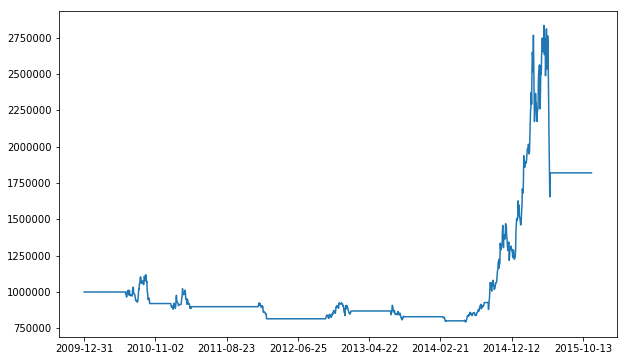

In [5]:
p=[0,1,1,0.001]
C.choose_strategy(HP("a", df))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

real date:2009-12-31
[[ 7.22      ]
 [ 7.17497751]
 [ 7.14326562]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
money:1900529.7600000007
cangwei:0
roi:0.9005297600000007
alpha:-0.66934630551
beta:1.76700063938
algorithem volatility: 6.40667274307
bench volatility: 3.22398130464
sharpe ratio: 0.168456483816
max drawdown: 0.28540664848506186
win ratio:0.1887719298245614
transfer times:58
1425


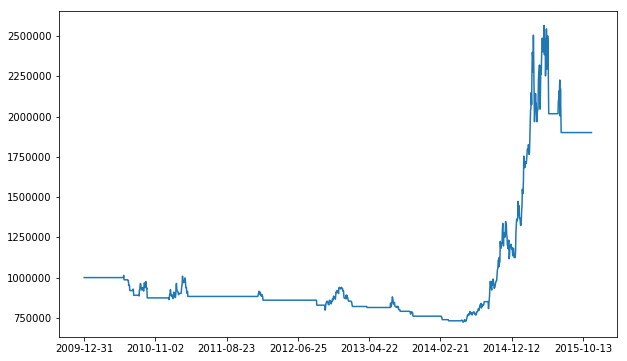

In [6]:
p=[0,1,1,0.001]
C.choose_strategy(Kalman("a", df,p))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

real date:2009-12-31
[[ 7.22      ]
 [ 7.17488778]
 [ 7.14299617]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
money:1440967.8200000005
cangwei:0
roi:0.4409678200000005
alpha:-0.184031418593
beta:1.22296105893
algorithem volatility: 4.24067702331
bench volatility: 3.22398130464
sharpe ratio: 0.241987002797
max drawdown: 0.37291747378327433
win ratio:0.2926315789473684
transfer times:142
1425


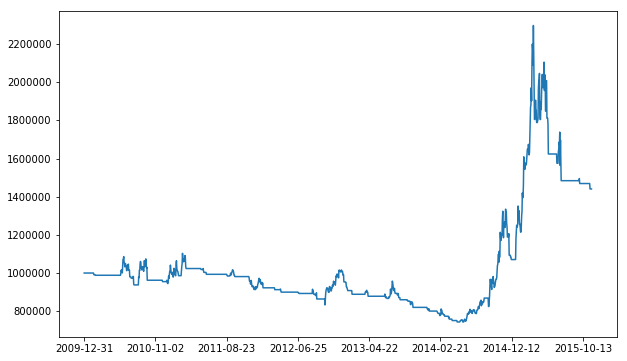

In [4]:
p=[0,1,1,0.005]
C.choose_strategy(Kalman("a", df,p))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

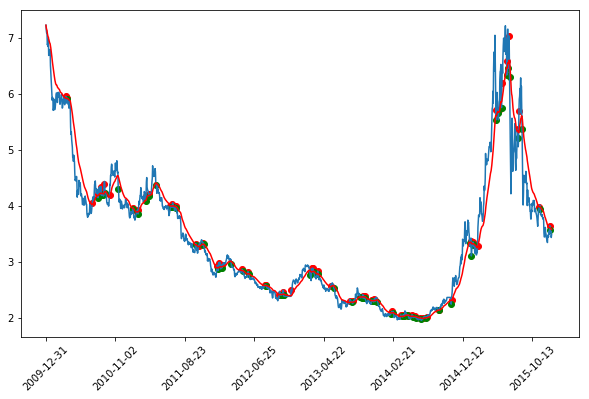

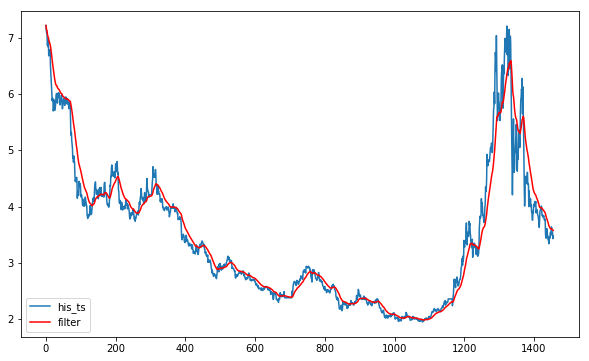

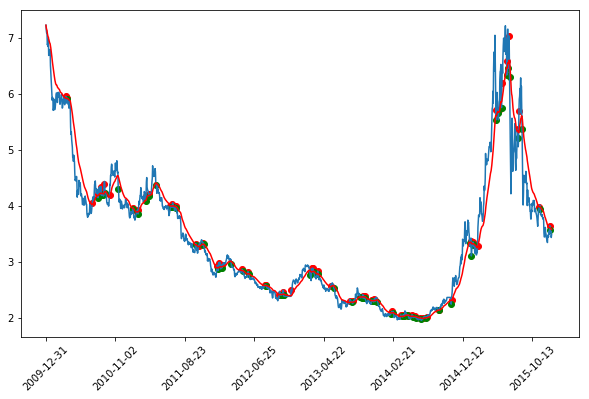

In [5]:
C.print_plot_filter()
C.print_trade_log_pic()


,name,time,price,tick,Signal,his_ts_index,trend
0,ss,2010-07-29,4.38,228310.0,1.0,140.0,0.001595
1,ss,2010-08-03,4.32,228310.0,-1.0,143.0,-0.000485
2,ss,2010-08-17,4.32,228310.0,1.0,153.0,0.000222
3,ss,2010-08-18,4.30,228310.0,-1.0,154.0,-0.000408
4,ss,2010-08-19,4.34,226206.0,1.0,155.0,0.000850
5,ss,2010-08-20,4.21,226206.0,-1.0,156.0,-0.003223
6,ss,2010-08-24,4.34,219430.0,1.0,158.0,0.001031
7,ss,2010-08-25,4.19,219430.0,-1.0,159.0,-0.003671
8,ss,2010-09-06,4.39,209433.0,1.0,167.0,0.003359
9,ss,2010-09-09,4.25,209433.0,-1.0,170.0,-0.001379


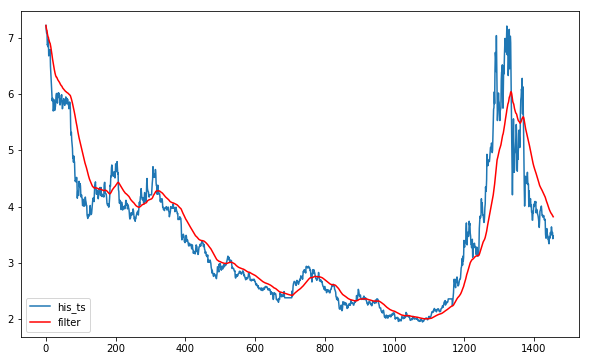

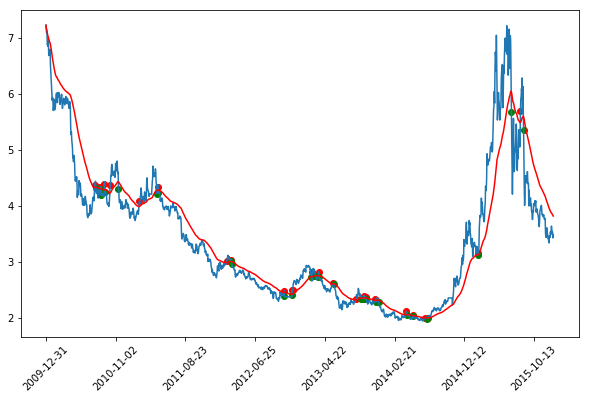

In [7]:
C.print_plot_filter()

C.print_trade_log_pic()
C.trade_log

real date:2009-12-31
money:1900529.7600000007
cangwei:0
roi:0.9005297600000007
alpha:-0.66934630551
beta:1.76700063938
algorithem volatility: 6.40667274307
bench volatility: 3.22398130464
sharpe ratio: 0.168456483816
max drawdown: 0.28540664848506186
win ratio:0.1887719298245614
transfer times:58
1425


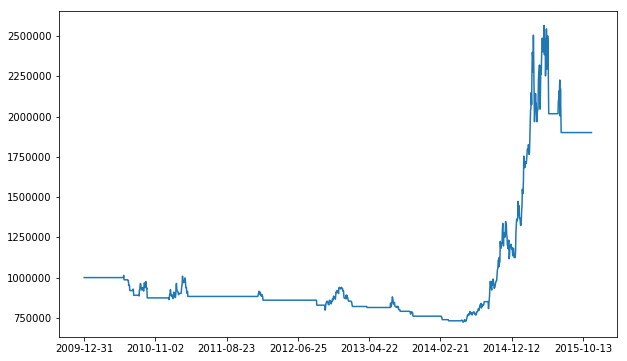

In [7]:
p=Param([20,5],5,5)
cap = pd.read_csv("capitalization11.csv")
C.choose_strategy(UKF("a", df,"600005.XSHG.csv",cap))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

real date:2009-12-31
money:1900529.7600000007
cangwei:0
roi:0.9005297600000007
alpha:-0.66934630551
beta:1.76700063938
algorithem volatility: 6.40667274307
bench volatility: 3.22398130464
sharpe ratio: 0.168456483816
max drawdown: 0.28540664848506186
win ratio:0.1887719298245614
transfer times:58
1425


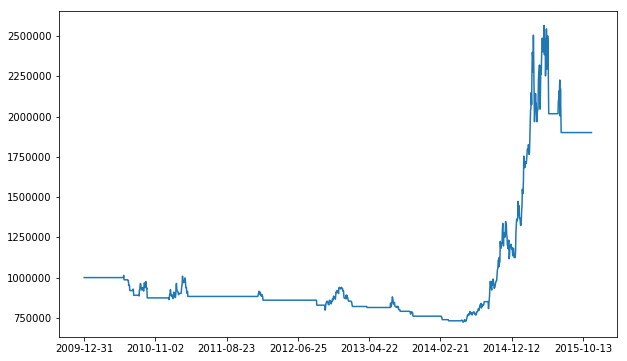

In [8]:
p=Param([20,5],5,5)
cap = pd.read_csv("capitalization11.csv")
C.choose_strategy(new_Kalman_0("a", df,"600005.XSHG.csv",cap))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))